In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head(2)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [18]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [19]:
sinasc.loc[:,['IDADEMAE', 'CONSULTAS', 'APGAR1', 'APGAR5', 'PESO']].describe()

,IDADEMAE,CONSULTAS,APGAR1,APGAR5,PESO
count,27028.000000,27028.000000,26932.000000,26925.000000,27028.000000
mean,26.093718,3.576402,8.137457,9.179164,3243.190654
std,6.387094,0.788492,0.984925,0.790574,544.754096
min,11.000000,1.000000,0.000000,0.000000,258.000000
25%,21.000000,3.000000,8.000000,9.000000,2965.000000
50%,26.000000,4.000000,8.000000,9.000000,3270.000000
75%,31.000000,4.000000,9.000000,10.000000,3575.000000
max,53.000000,9.000000,10.000000,10.000000,5985.000000


In [2]:
#Selecionando as colunas de interesse
df = sinasc.loc[:, ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]
df.head(2)

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4


In [3]:
#Verficando os missing em cada coluna
df.isna().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [27]:
#Removendo linhas com valores ausentes para as colunas APGAR5 e SEXO
sinasc.dropna(subset = ['APGAR5', 'SEXO'], inplace = True)
#Substituindo valores NaN na coluna GESTACAO
sinasc['GESTACAO'].fillna('Ignorado', inplace = True)
#Convertendo valores de APGAR5 para tipo inteiro
sinasc['APGAR5'] = sinasc['APGAR5'].astype('int')
#Contagem de missings após tratamento dos dados ausentes
sinasc[['APGAR5','SEXO', 'GESTACAO', 'PESO']].isna().sum()

APGAR5      0
SEXO        0
GESTACAO    0
PESO        0
dtype: int64

In [5]:
#Contagem dos valores para cada um das categoria da varíavel GESTACAO
df['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
Ignorado                1232
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

In [6]:
#Reatribuindo valores da coluna EStado civil da mãe 
df.loc[df['ESTCIVMAE'] == 1, 'ESTCIVMAE'] = 'Solteira'
df.loc[df['ESTCIVMAE'] == 2, 'ESTCIVMAE'] = 'Casada'
df.loc[df['ESTCIVMAE'] == 3, 'ESTCIVMAE'] = 'Viúva'
df.loc[df['ESTCIVMAE'] == 4, 'ESTCIVMAE'] = 'Separado judicialmente'
df.loc[df['ESTCIVMAE'] == 5, 'ESTCIVMAE'] = 'União consensual'
df.loc[df['ESTCIVMAE'] == 9, 'ESTCIVMAE'] = 'Ignorado'
#Preenchindo os missings com o valor 'Ignorado'
df['ESTCIVMAE'].fillna('Ignorado', inplace = True)
#Cotagem dos valores de cada categoria estado civil
df['ESTCIVMAE'].value_counts().sort_values()

Viúva                       57
Separado judicialmente     453
Ignorado                   462
União consensual          7180
Solteira                  8952
Casada                    9924
Name: ESTCIVMAE, dtype: int64

In [7]:
#Substituindo valores da varíavel consulta
df.loc[df['CONSULTAS'] == 1, 'CONSULTAS'] = 'Nenhuma'
df.loc[df['CONSULTAS'] == 2, 'CONSULTAS'] = 'De 2 a 3'
df.loc[df['CONSULTAS'] == 3, 'CONSULTAS'] = 'De 4 a 6'
df.loc[df['CONSULTAS'] == 4, 'CONSULTAS'] = '7 ou mais'
df.loc[df['CONSULTAS'] == 9, 'CONSULTAS'] = 'Ignorado'
#Contagem dos valores
df['CONSULTAS'].value_counts()

7 ou mais    18624
De 4 a 6      5988
De 2 a 3      1379
Nenhuma        986
Ignorado        51
Name: CONSULTAS, dtype: int64

### Gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

Text(0.5, 1.0, 'Valor Médio do APGAR1 por Sexo')

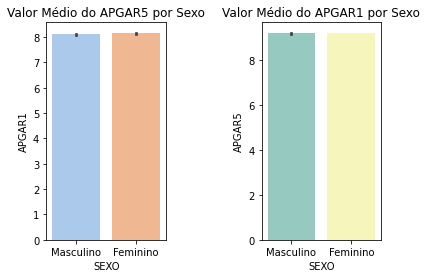

In [8]:
#Plotagem do valor médio do APGAR1 por sexo 
plt.close('all')
fig, ax = plt.subplots(1, 2)
#Plotagem do valor médio do APGAR5 por sexo 
sns.barplot(ax=ax[0],x = 'SEXO', y = 'APGAR1', data = df, palette = 'pastel')
#Plotagem do valor médio do APGAR1 por sexo 
sns.barplot(ax=ax[1],x = 'SEXO', y = 'APGAR5', data = df, palette = 'Set3')
#Ajuste do espacemento
plt.subplots_adjust(wspace = 0.8)
#Criando títulos
ax[0].set_title("Valor Médio do APGAR5 por Sexo")
ax[1].set_title("Valor Médio do APGAR1 por Sexo")

In [9]:
#Agrupando as categorias da variável GESTACAO, 
#calculando a média dos valores do APGAR5 de cada categoria e ordenado os valores em ordem crescente
#Atribuindo valores a uma variável
media_grupo = df.groupby('GESTACAO')['APGAR5'].mean().sort_values().values
#Atribuindo os índices a uma variável
nomes_grupo = df.groupby('GESTACAO')['APGAR5'].mean().sort_values().index

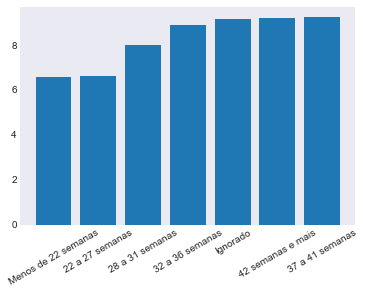

In [10]:
#Plotando o valor médio do APGAR5 por tempo de Gestação
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(nomes_grupo, media_grupo)
ax.tick_params(axis = 'x', rotation = 30)

Text(0.5, 1.05, 'Valor Médio do APGAR1 por Tempo de Gestação')

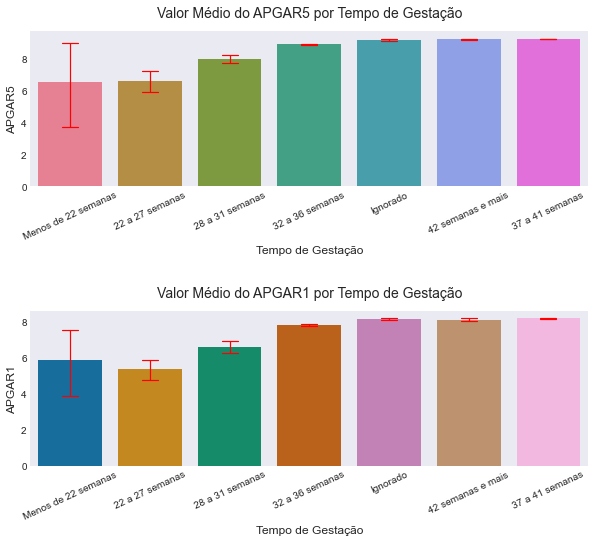

In [11]:
#Plotagem do APGAR5 e APGAR1 por tempo de Gestação, usando seaborn 
plt.close('all')
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
#Ordenando as barras pelo valor médio do APGAR
sns.barplot(ax = ax[0], x = 'GESTACAO', y = 'APGAR5', data = df,
            order = nomes_grupo, palette = 'husl',
            errcolor = 'r', errwidth = 1.2, capsize = 0.2)
sns.barplot(ax = ax[1], x = 'GESTACAO', y = 'APGAR1',
            data = df, order = nomes_grupo, palette = 'colorblind',
            errcolor = 'r', errwidth = 1.2, capsize = 0.2)
#Rotacionando os ticks no eixo x
ax[0].tick_params(axis = 'x', rotation = 25)
ax[1].tick_params(axis = 'x', rotation = 25)
#Ajuste do espaçamento entre os gráficos
plt.subplots_adjust(hspace = 0.8)
#Nomeando rótulo no eixo x
ax[0].set_xlabel('Tempo de Gestação', fontsize = 12)
ax[1].set_xlabel('Tempo de Gestação', fontsize = 12)
#Nomeando rótulo no eixo y
ax[0].set_ylabel('APGAR5', fontsize = 12)
ax[1].set_ylabel('APGAR1', fontsize = 12)
#Colocando o título
ax[0].set_title('Valor Médio do APGAR5 por Tempo de Gestação', fontsize = 14, y = 1.05)
ax[1].set_title('Valor Médio do APGAR1 por Tempo de Gestação', fontsize = 14, y = 1.05)

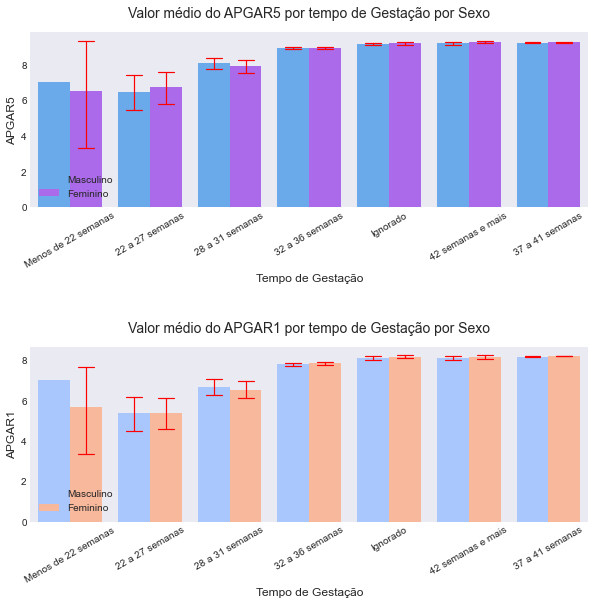

In [12]:
#Plotagem do APGAR5 médio por tempo de Gestação de acordo com o sexo ordenado em ordem crescente
fig, ax = plt.subplots(2, 1, figsize = (10, 9))
sns.barplot(ax = ax[0], x = 'GESTACAO', y = 'APGAR5', hue = 'SEXO', data = df,
           order = nomes_grupo, palette = 'cool',
           errcolor = 'r', errwidth = 1.2, capsize = 0.2)
#Plotagem do APGAR5 médio por tempo de Gestação de acordo com o sexo ordenado em ordem crescente
sns.barplot(ax = ax[1], x = 'GESTACAO', y = 'APGAR1', hue = 'SEXO', data = df,
           order = nomes_grupo, palette = 'coolwarm', saturation = 1,
           errcolor = 'r', errwidth = 1.2, capsize = 0.2)
#Rotação dos ticks no eixo x
ax[0].tick_params(axis = 'x', rotation = 30)
ax[1].tick_params(axis = 'x', rotation = 30)
#Ajuste do espaçamento entre os gráficos
plt.subplots_adjust(hspace = 0.8)
#Eixo x
ax[0].set_xlabel('Tempo de Gestação', fontsize = 12)
ax[1].set_xlabel('Tempo de Gestação', fontsize = 12)
#Eixo y
ax[0].set_ylabel('APGAR5', fontsize = 12)
ax[1].set_ylabel('APGAR1', fontsize = 12)
#Título
ax[0].set_title('Valor médio do APGAR5 por tempo de Gestação por Sexo', fontsize = 14, y = 1.05)
ax[1].set_title('Valor médio do APGAR1 por tempo de Gestação por Sexo', fontsize = 14, y = 1.05)
#Legendas
ax[0].legend(loc='best')
ax[1].legend(loc='best')

In [13]:
APGAR5_med_ESTCIVMAE = df.groupby('ESTCIVMAE')['APGAR5'].mean()
APGAR5_med_ESTCIVMAE

ESTCIVMAE
Casada                    9.216334
Ignorado                  9.187364
Separado judicialmente    9.141907
Solteira                  9.113394
União consensual          9.211197
Viúva                     9.210526
Name: APGAR5, dtype: float64

[Text(0.5, 0, 'Estado civil da mãe'),
 Text(0, 0.5, 'APGAR5 Médio'),
 Text(0.5, 1.0, 'APGAR5 Médio por Estado Civil da Mãe')]

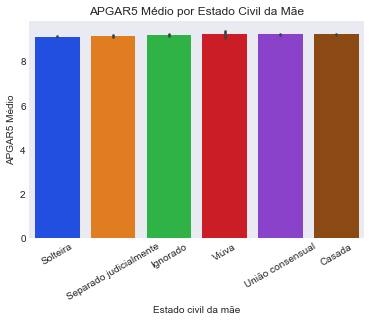

In [14]:
#Plotagem do APGAR5 médio por Estado civil da mãe
fig, ax = plt.subplots()
sns.barplot(ax = ax, x='ESTCIVMAE', y = 'APGAR5', data = df,
           order = APGAR5_med_ESTCIVMAE.sort_values().index, palette = 'bright')
#Rotação dos ticks no eixo x
ax.tick_params(axis = 'x', rotation = 30)
#Adicionando rótulos aos eixos e um título
ax.set(xlabel = 'Estado civil da mãe', ylabel = 'APGAR5 Médio', title = 'APGAR5 Médio por Estado Civil da Mãe')

### Gráfico de barras: APGAR5 médio por CONSULTAS

In [15]:
APGAR5_med_consultas = df.groupby('CONSULTAS')['APGAR5'].mean()
APGAR5_med_consultas

CONSULTAS
7 ou mais    9.207188
De 2 a 3     9.057395
De 4 a 6     9.154440
Ignorado     8.860000
Nenhuma      8.981481
Name: APGAR5, dtype: float64

Text(0.5, 1.02, 'APGAR5 Médio por Nº de Consultas')

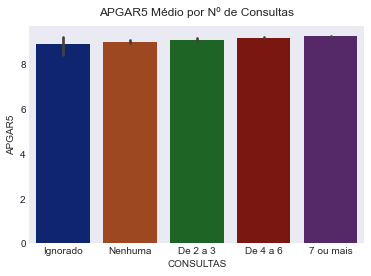

In [16]:
ax = sns.barplot(x = 'CONSULTAS', y = 'APGAR5', estimator = np.mean, data = df,
                order = APGAR5_med_consultas.sort_values().index, palette = 'dark')
ax.set_title('APGAR5 Médio por Nº de Consultas', fontsize = 12, y = 1.02)

### Painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

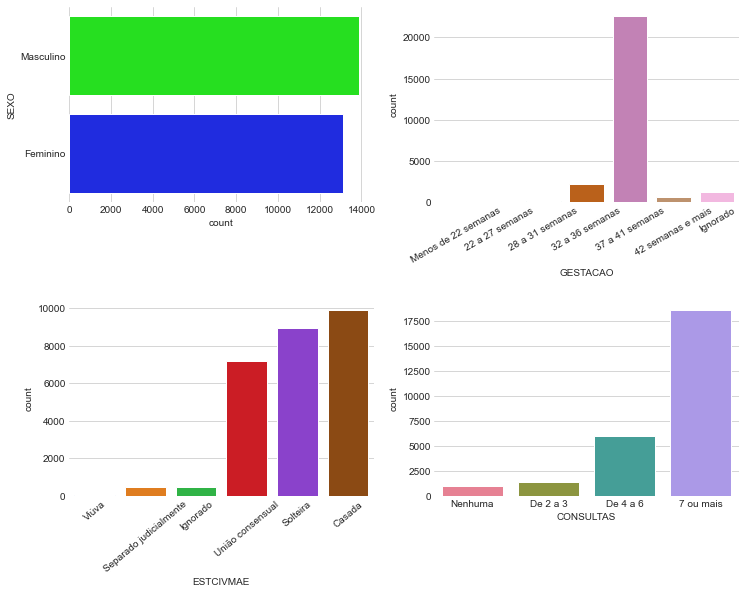

In [17]:
plt.close('all')
sns.set_style("whitegrid")
plt.rc('figure', figsize=(12, 9))
fig, ax = plt.subplots(2, 2)

#Gráfico I-Frequência da variável SEXO
sns.countplot(ax= ax[0,0], y='SEXO', data=df, palette = 'hsv')
#Gráfico II-Frequência para o tempo de gestação
sns.countplot(ax = ax[0,1], x = 'GESTACAO', data = df, 
              order = ['Menos de 22 semanas',
                       '22 a 27 semanas', 
                       '28 a 31 semanas',
                       '32 a 36 semanas',
                       '37 a 41 semanas',
                       '42 semanas e mais',
                       'Ignorado'],
              palette = 'colorblind'
             )
ax[0,1].tick_params(axis = 'x', rotation = 30)
#Gráfico III-Frequência para o estado civil da mãe
sns.countplot(ax = ax[1,0], x = 'ESTCIVMAE', data = df,
              order = df['ESTCIVMAE'].value_counts().sort_values().index,
              palette = 'bright'
             )
ax[1,0].tick_params(axis = 'x', rotation = 40)
#Gráfico IV-Frequência para as categorias de Consultas
sns.countplot(ax = ax[1,1], x = 'CONSULTAS', data = df,
              order = ['Nenhuma', 'De 2 a 3', 'De 4 a 6', '7 ou mais'],
              palette = 'husl'
             )
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

### boxplot da idade da mãe.

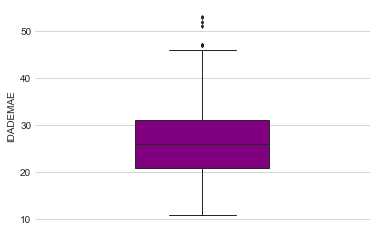

In [22]:
plt.figure(figsize = (6, 4))
sns.boxplot(y = 'IDADEMAE',
            data = sinasc,
            color = 'Purple',
            saturation = 1,
            width = 0.4,
            linewidth = 1,
           fliersize = 2.5);

### boxplot do peso do bebê

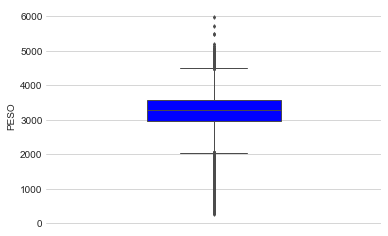

In [24]:
plt.figure(figsize = (6, 4))
sns.boxplot(y = 'PESO',
            data = sinasc,
            color = 'Blue',
            saturation = 1,
            width = 0.4,
            linewidth = 1,
            fliersize = 2.5);

### histograma da idade da mãe

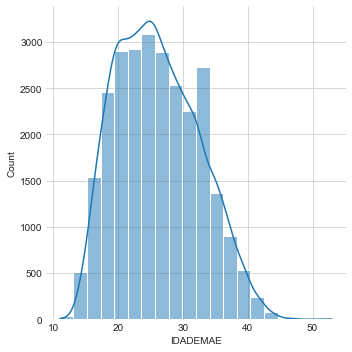

In [25]:
sns.displot(data = sinasc,
            alpha = 0.5,
            x = 'IDADEMAE',
            bins = 20,
            kde = True);

### histograma do peso do bebê

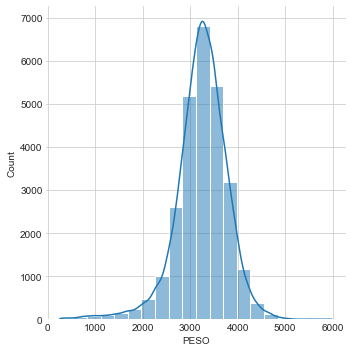

In [26]:
sns.displot(data = sinasc, 
            alpha = 0.5, 
            x = 'PESO', 
            bins = 20, 
            kde = True);

### Categorizando a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [28]:
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'cat_APGAR5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'cat_APGAR5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'cat_APGAR5'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'cat_APGAR5'] = 'normal'

sinasc.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_APGAR5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


### Gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

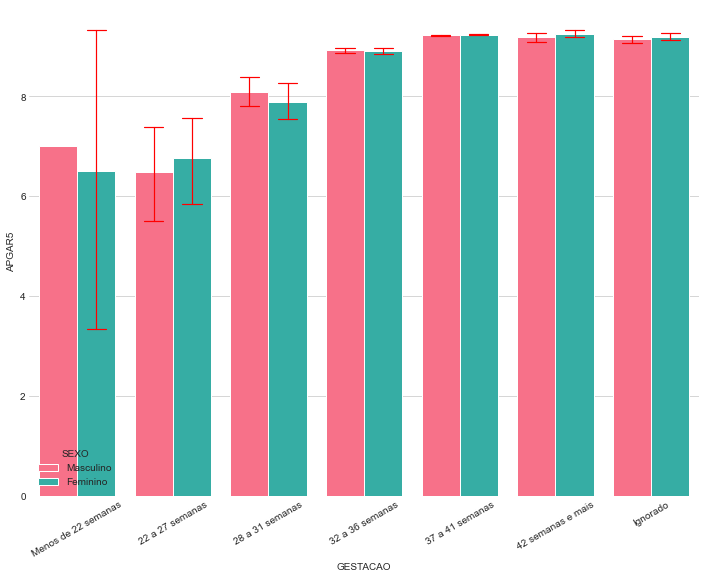

In [29]:
#Valor médio do APGAR5 por sexo para cada grupo de tempo de gestação
ordem = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas',
         '32 a 36 semanas','37 a 41 semanas', '42 semanas e mais', 
         'Ignorado']
g = sns.barplot(x = 'GESTACAO', 
                y = 'APGAR5',
                hue = 'SEXO',
                data = sinasc, 
                order = ordem, 
                palette = 'husl', 
                saturation = 1, 
                errcolor = 'r', 
                errwidth = 1.2, 
                capsize = 0.2);
g.tick_params(axis = 'x', rotation = 30)

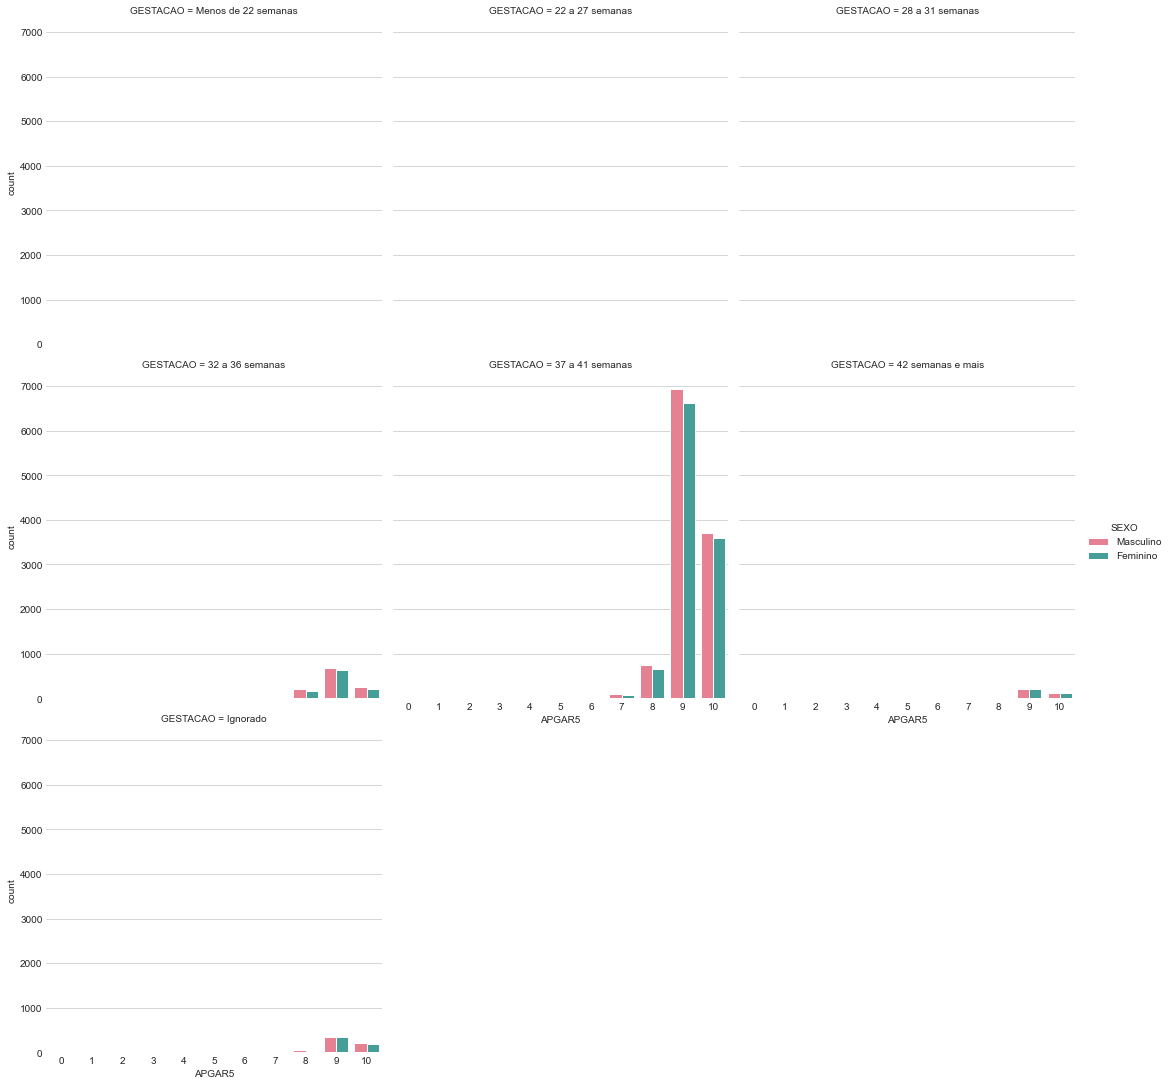

In [30]:
#Plotagem pelo método catplot
g = sns.catplot(x = 'APGAR5', 
            hue = 'SEXO',
            col = 'GESTACAO',
            col_order = ordem,
            col_wrap = 3,
            data = sinasc, 
            kind = 'count',
            palette = 'husl');

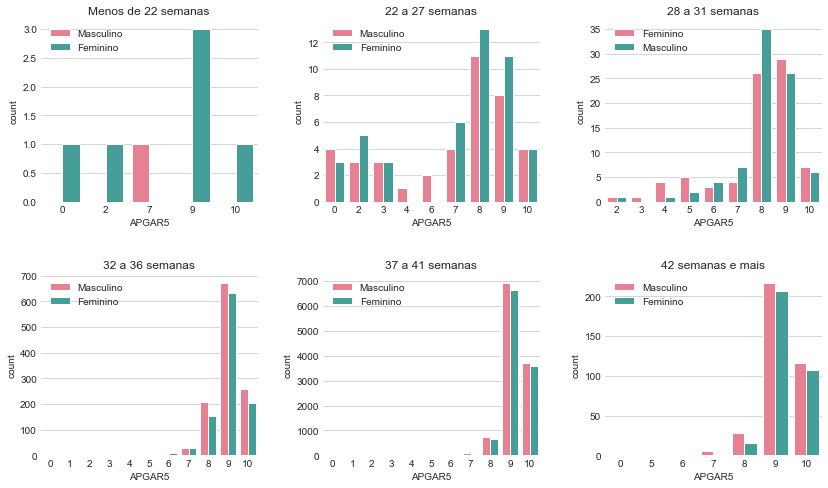

In [31]:
fig, ax = plt.subplots(2, 3, figsize = (14, 8))

#Gráfico I-Distribuição de APGAR5 por sexo para categoria 'Menos de 22 semanas'
sns.countplot(ax = ax[0,0], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == 'Menos de 22 semanas'], 
              palette = 'husl')
ax[0,0].set_title('Menos de 22 semanas')
ax[0,0].legend(loc = 'upper left')
#Gráfico II-Distribuição de APGAR5 por sexo para categoria '22 a 27 semanas'
sns.countplot(ax = ax[0,1], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '22 a 27 semanas'], 
              palette = 'husl')
ax[0,1].set_title('22 a 27 semanas')
ax[0,1].legend(loc = 'upper left')
#Gráfico III-Distribuição de APGAR5 por sexo para categoria '28 a 31 semanas'
sns.countplot(ax = ax[0,2], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '28 a 31 semanas'], 
              palette = 'husl')
ax[0,2].set_title('28 a 31 semanas')
ax[0,2].legend(loc = 'upper left')
#Gráfico IV-Distribuição de APGAR5 por sexo para categoria '32 a 36 semanas'
sns.countplot(ax = ax[1,0], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '32 a 36 semanas'], 
              palette = 'husl')
ax[1,0].set_title('32 a 36 semanas')
ax[1,0].legend(loc = 'upper left')
#Gráfico V-Distribuição de APGAR5 por sexo para categoria '37 a 41 semanas'
sns.countplot(ax = ax[1,1], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '37 a 41 semanas'], 
              palette = 'husl')
ax[1,1].set_title('37 a 41 semanas')
ax[1,1].legend(loc = 'upper left')
#Gráfico VI-Distribuição de APGAR5 por sexo para categoria '42 semanas e mais'
sns.countplot(ax = ax[1,2], 
              x = 'APGAR5', 
              hue = 'SEXO', 
              data = sinasc[sinasc['GESTACAO'] == '42 semanas e mais'], 
              palette = 'husl')
ax[1,2].set_title('42 semanas e mais')
ax[1,2].legend(loc = 'upper left')
#Ajuste dos gráficos
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

### Tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas


In [32]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,1,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,44,151,1417,13564,7283
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Ignorado,1,2,2,1,2,5,7,7,86,704,399
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


#### Da tabela cruzada anterior, calculamos os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [33]:
#Soma dos valores de cada linha
total_grupo = freq.sum(axis = 1)
total_grupo

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2233
37 a 41 semanas        22520
42 semanas e mais        698
Ignorado                1216
Menos de 22 semanas        7
dtype: int64

In [34]:
freq_percentual = freq.div(total_grupo, axis = 0)
freq_percentual

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Ignorado,0.000822,0.001645,0.001645,0.000822,0.001645,0.004112,0.005757,0.005757,0.070724,0.578947,0.328125
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [35]:
#Verificando se os percentuais de cada somam 1 (100%)
freq_percentual.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Ignorado               1.0
Menos de 22 semanas    1.0
dtype: float64

#### Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

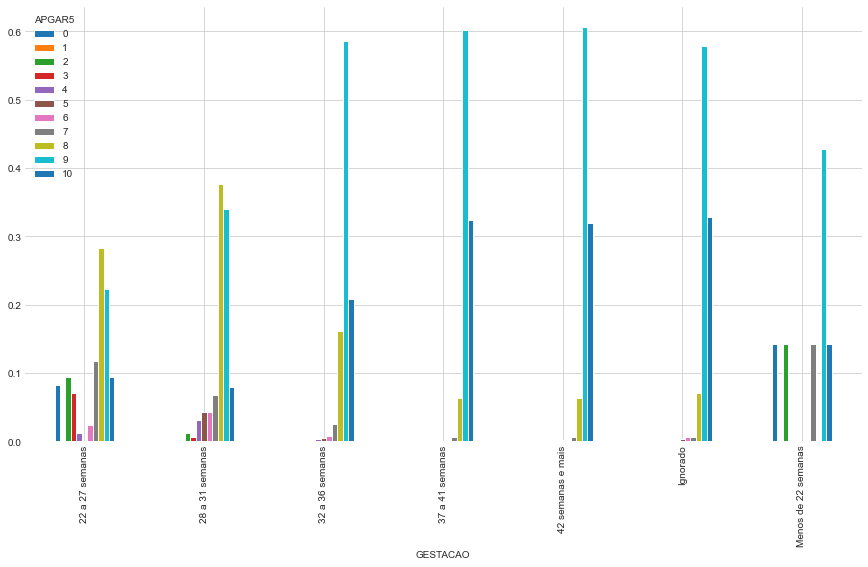

In [36]:
freq_percentual.plot(kind = 'bar', figsize = (15, 8));

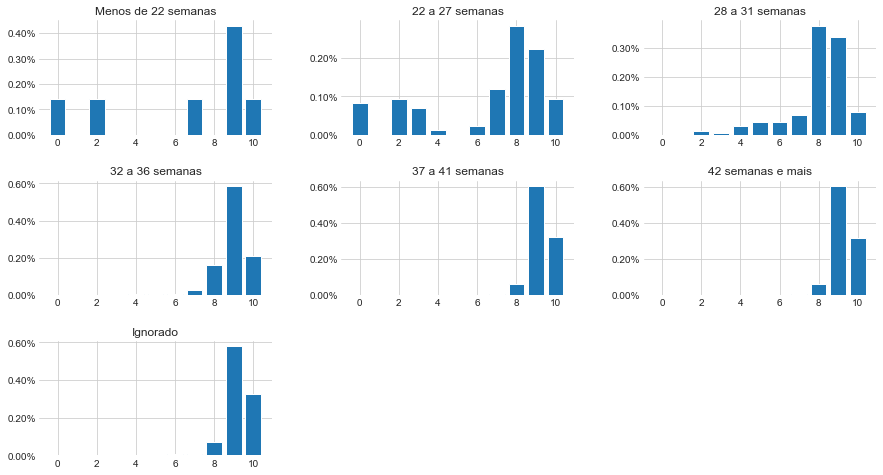

In [37]:
from matplotlib import ticker

fig = plt.figure(figsize = (15, 8))
valores_APGAR5 = freq_percentual.columns
#Gráfico I-Distribuição percentual dos valores de APGAR5 para categoria 'Menos de 22 semanas'
ax1 = fig.add_subplot(3, 3, 1)
ax1.bar(valores_APGAR5, freq_percentual.loc['Menos de 22 semanas'])
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax1.set_title('Menos de 22 semanas')
#Gráfico II-Distribuição percentual dos valores de APGAR5 para categoria '22 a 27 semanas'
ax2 = fig.add_subplot(3, 3, 2)
ax2.bar(valores_APGAR5, freq_percentual.loc['22 a 27 semanas'])
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax2.set_title('22 a 27 semanas')
#Gráfico III-Distribuição percentual dos valores de APGAR5 para categoria '28 a 31 semanas'
ax3 = fig.add_subplot(3, 3, 3)
ax3.bar(valores_APGAR5, freq_percentual.loc['28 a 31 semanas'])
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax3.set_title('28 a 31 semanas')
#Gráfico IV-Distribuição percentual dos valores de APGAR5 para categoria '32 a 36 semanas'
ax4 = fig.add_subplot(3, 3, 4)
ax4.bar(valores_APGAR5, freq_percentual.loc['32 a 36 semanas'])
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax4.set_title('32 a 36 semanas')
#Gráfico V-Distribuição percentual dos valores de APGAR5 para categoria '37 a 41 semanas'
ax5 = fig.add_subplot(3, 3, 5)
ax5.bar(valores_APGAR5, freq_percentual.loc['37 a 41 semanas'])
ax5.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax5.set_title('37 a 41 semanas')
#Gráfico VI-Distribuição percentual dos valores de APGAR5 para categoria '42 semanas e mais'
ax6 = fig.add_subplot(3, 3, 6)
ax6.bar(valores_APGAR5, freq_percentual.loc['42 semanas e mais'])
ax6.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax6.set_title('42 semanas e mais')
#Gráfico VII-Distribuição percentual dos valores de APGAR5 para categoria 'Ignorado'
ax7 = fig.add_subplot(3, 3, 7)
ax7.bar(valores_APGAR5, freq_percentual.loc['Ignorado'])
ax7.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
ax7.set_title('Ignorado')
#Ajuste dos gráficos
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)

Percebe-se que para tempos de gestação acima de 32 semanas, há uma maior concentração de valores de APGAR5 entre 8 e 10, faixa de valores consideradas normais. No entanto, é possível obervar uma concentração significativa (acima de 50%) em torno desse valores para grupos com menos de 32 semanas. O que se observa é um maior espalhamento dos valores de APGAR5 para outras faixas de valores não considerados normais. Contudo, o fato de crianças terem nascidas antes de 37 semanas de gestação não é suficiente para afirmar que serão prematuras.

#### Verificando se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

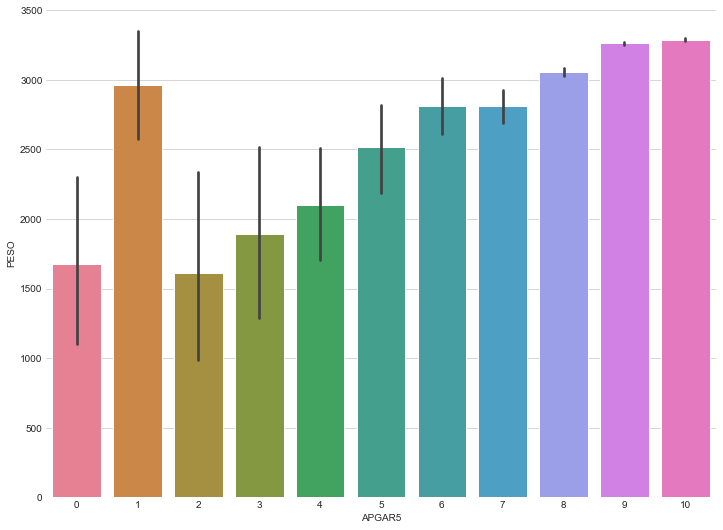

In [38]:
sns.barplot(x = 'APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'husl');

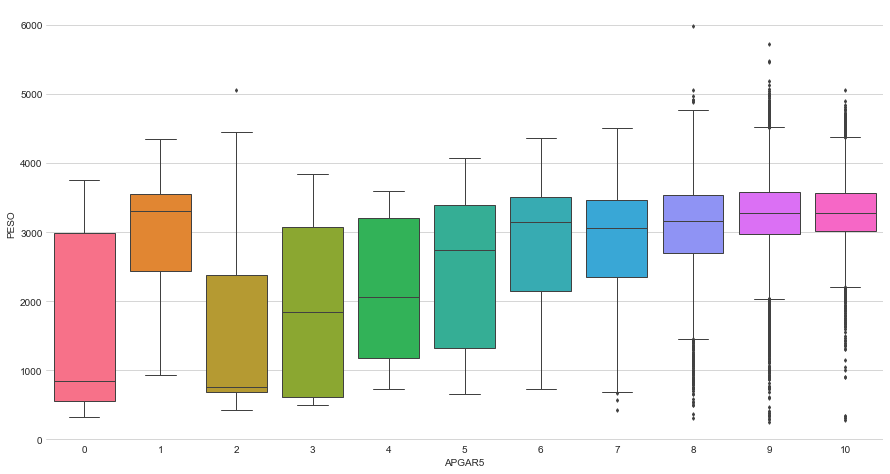

In [39]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(ax = ax, 
            y = 'PESO', 
            x = 'APGAR5', 
            data = sinasc, 
            palette = 'husl', 
            saturation = 1, 
            linewidth = 1, 
            fliersize = 2.5);

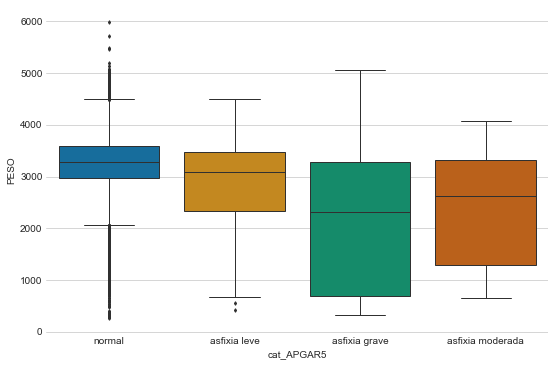

In [40]:
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot()
sns.boxplot(ax = ax, 
            x = 'cat_APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'colorblind', 
            linewidth = 1, 
            fliersize = 2.5);